In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.manifold import TSNE
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv('train.csv/train.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
38834,38834,70479,70480,Can I get cashback when paying my LIC instalme...,How can I get cashback on a credit card?,0
95300,95300,158974,51108,Is it plausible to lose 75 pounds in 2 months?,Is it safe to lose 75 pound in 2 months?,0
231258,231258,204735,341023,Can I send money to a bank account without a b...,What is the most secure way to send money to s...,0
118683,118683,192844,192845,What is the process involved in making an anim...,What is the complete process of making a 2D or...,1
118057,118057,22016,191972,Why do people get married?,Can you fall in love with someone else even wh...,0
218372,218372,324957,324958,Is allah a moon god?,Why do some non-Muslims say Allah was the moon...,1
13542,13542,25992,25993,What are the great examples of hypocrisy in In...,What are some of the best examples of hypocris...,1
13043,13043,25075,25076,How do I replace the battery in a Movado watch?,Where can I replace the battery in my Movado w...,0
123492,123492,199650,199651,How do I successfully pick stocks?,How can I get good at picking winning stocks?,0
162896,162896,14063,100946,What is the deep/dark web and how do you acces...,Can I somehow earn money on the deep/dark web?,0


In [5]:
df.shape

(404290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.fillna('OK',inplace=True)

In [10]:
df.duplicated().sum()

0

<AxesSubplot:>

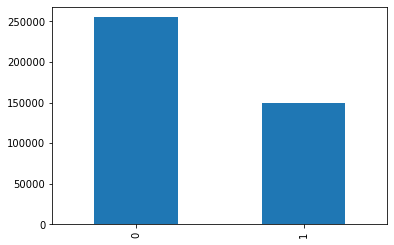

In [11]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:

new_df = df.sample(100000,random_state=2)
ques_df = new_df[['question1','question2']]

In [13]:
Qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('No. of Unique questions',np.unique(Qid).shape[0])
x = Qid.value_counts()>1
print('Number of question getting repeated',x[x].shape[0])

No. of Unique questions 537933
Number of question getting repeated 111780


In [14]:
new_df.shape

(100000, 6)

In [15]:
ques_df.index

Int64Index([398782, 115086, 327711, 367788, 151235, 244531,  16633, 396316,
            399493,  15268,
            ...
             62872, 188039, 180540, 105425, 152254, 147622, 353951, 251765,
            150383, 165218],
           dtype='int64', length=100000)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(new_df['question1']) + list(new_df['question2'])

In [17]:
questions = list(new_df['question1']) + list(new_df['question2'])

In [18]:
cv = CountVectorizer(max_features=1000)
q1,q2 = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [19]:
temp_df1 = pd.DataFrame(q1,index=ques_df.index)
temp_df2 = pd.DataFrame(q2,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape



(100000, 2000)

In [20]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [21]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,is_duplicate
398782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
115086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
353951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251765,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150383,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

In [22]:
new_df['q1_length'] = new_df['question1'].str.len()
new_df['q2_length'] = new_df['question2'].str.len()

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [24]:
new_df['q1_wrd'] = new_df['question1'].apply(lambda x:len(x.split(" ")))
new_df['q2_wrd'] = new_df['question2'].apply(lambda x:len(x.split(" ")))


In [25]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))  
#     print(w1)
    return len(w1 & w2)


In [26]:

new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [27]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))  
#     print(len(w1))
#     print(w1)
    return (len(w1) + len(w2))

In [28]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [29]:
new_df["word_share"] = round(new_df["word_common"]*100/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,45.83
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,30.43
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,5.88
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,23.08


minimum characters :  1
maximum characters :  391
average characters :  59


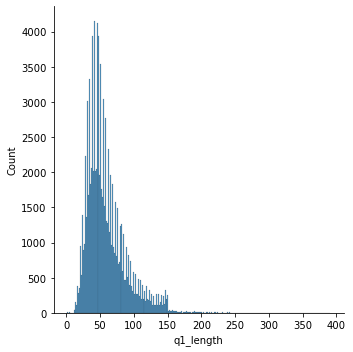

In [30]:
sns.displot(new_df['q1_length'])
print("minimum characters : ",new_df['q1_length'].min())
print("maximum characters : ",new_df['q1_length'].max())
print("average characters : ",int(new_df['q1_length'].mean()))

minimum characters :  2
maximum characters :  1151
average characters :  60


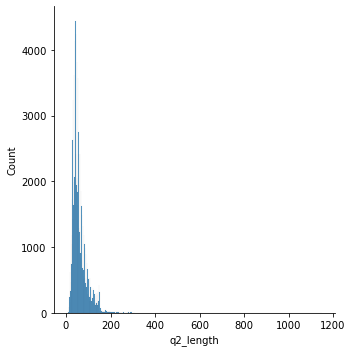

In [31]:
sns.displot(new_df['q2_length'])
print("minimum characters : ",new_df['q2_length'].min())
print("maximum characters : ",new_df['q2_length'].max())
print("average characters : ",int(new_df['q2_length'].mean()))

minimum characters :  1
maximum characters :  72
average characters :  10


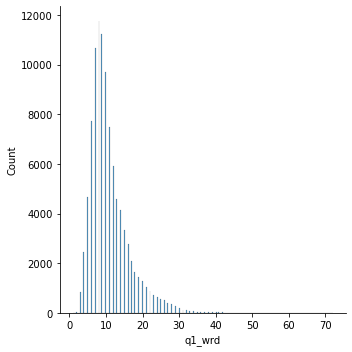

In [32]:
sns.displot(new_df['q1_wrd'])
print("minimum characters : ",new_df['q1_wrd'].min())
print("maximum characters : ",new_df['q1_wrd'].max())
print("average characters : ",int(new_df['q1_wrd'].mean()))

minimum characters :  1
maximum characters :  237
average characters :  11


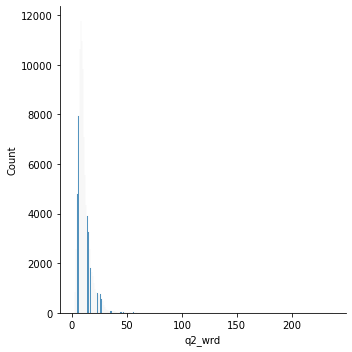

In [33]:
sns.displot(new_df['q2_wrd'])
print("minimum characters : ",new_df['q2_wrd'].min())
print("maximum characters : ",new_df['q2_wrd'].max())
print("average characters : ",int(new_df['q2_wrd'].mean()))

<AxesSubplot:xlabel='word_common', ylabel='count'>

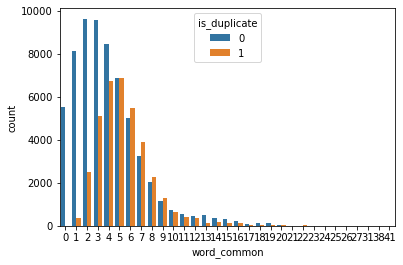

In [34]:
sns.countplot(x = 'word_common',hue='is_duplicate',data = new_df)

<AxesSubplot:xlabel='word_common', ylabel='Density'>

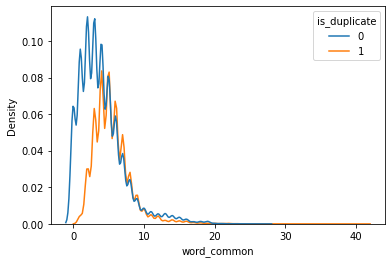

In [35]:
sns.kdeplot(x = 'word_common',hue='is_duplicate',data = new_df)

In [36]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [37]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,45.83
115086,0,49,57,12,15,7,23,30.43
327711,0,105,120,25,17,2,34,5.88
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,23.08


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
questions = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=1200)
q1,q2 = np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df1 = pd.DataFrame(q1,index=ques_df.index)
temp_df2 = pd.DataFrame(q2,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape


(100000, 2400)

In [39]:
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(100000, 2408)


,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common,word_total,word_share,0,1,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
398782,1,76,77,12,12,11,24,45.83,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,30.43,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,5.88,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,0,0,1,0,0,0,0
151235,0,35,50,5,9,3,13,23.08,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
stopwords_english = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their',
'theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had''having''do''does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now']

In [41]:

def process_text(raw_text):
    npunc = [char for char in raw_text if char not in string.punctuation]
    npunc = ''.join(npunc)
    return npunc

In [42]:

new_df['question1'] = new_df['question1'].apply(process_text)
new_df['question2'] = new_df['question2'].apply(process_text)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,45.83
115086,115086,187729,187730,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...,0,49,57,12,15,7,23,30.43
327711,327711,454161,454162,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...,0,105,120,25,17,2,34,5.88
367788,367788,498109,491396,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy,0,35,50,5,9,3,13,23.08


In [43]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords_english
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [44]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [45]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,...,24,45.83,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1.0,1.0
115086,115086,187729,187730,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...,0,49,57,12,15,...,23,30.43,0.833319,0.714276,0.499988,0.399992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...,0,105,120,25,17,...,34,5.88,0.000000,0.000000,0.499988,0.249997,0.117646,0.080000,0.0,0.0
367788,367788,498109,491396,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,...,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy,0,35,50,5,9,...,13,23.08,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1.0,0.0


In [46]:
# pip install distance

In [47]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
   
    length_features[2] = len(strs) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [48]:

length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [49]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest What should I do,I am quite poor and I want to be very rich Wha...
327711,I am from India and live abroad I met a guy fr...,TIET to Thapar University to Thapar University...
367788,Why do so many people in the US hate the south...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy,What was the reason behind the Bhopal gas tragedy


In [50]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,1,76,77,12,12,11,24,45.83,0.874989,0.874989,0.999975,0.999975,0.916659,0.916659,1.0,1.0,0.0,12.0,0.013333
115086,0,49,57,12,15,7,23,30.43,0.833319,0.714276,0.499988,0.399992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.020833
327711,0,105,120,25,17,2,34,5.88,0.000000,0.000000,0.499988,0.249997,0.117646,0.080000,0.0,0.0,8.0,21.0,0.009804
367788,0,59,146,12,30,0,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,18.0,21.0,0.035088
151235,0,35,50,5,9,3,13,23.08,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.028571


In [51]:

from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=2000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [52]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(100000, 4000)

In [53]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(100000, 4019)


,is_duplicate,q1_length,q2_length,q1_wrd,q2_wrd,word_common,word_total,word_share,cwc_min,cwc_max,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
398782,1,76,77,12,12,11,24,45.83,0.874989,0.874989,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,30.43,0.833319,0.714276,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,5.88,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,23.08,0.749981,0.499992,...,0,0,0,0,0,0,0,0,0,0


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)



In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred))
# for random forest model
confusion_matrix(y_test,y_pred)

0.79925


array([[10871,  1755],
       [ 2260,  5114]], dtype=int64)

In [56]:
from joblib import Parallel, delayed
import joblib
joblib.dump(rf, 'Quora.pkl')
joblib.dump(cv, 'CountVector.pkl')

['CountVector.pkl']